In [273]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [274]:
directory=os.listdir('AudioWAV/')
print(len(directory))

7442


In [275]:
emotion= []
path= []
for audio_file in directory:
    if "ANG" in audio_file:
        emotion.append("Angry")
        path.append("AudioWAV/"+str(audio_file))
    if "HAP" in audio_file:
        emotion.append("Happy")
        path.append("AudioWAV/"+str(audio_file))
    if "SAD" in audio_file:
        emotion.append("Sad")
        path.append("AudioWAV/"+str(audio_file))
    if "FEA" in audio_file:
        emotion.append("Fear")
        path.append("AudioWAV/"+str(audio_file))
    if "DIS" in audio_file:
        emotion.append("Disgust")
        path.append("AudioWAV/"+str(audio_file))

In [276]:
df = pd.DataFrame({
    'Emotion': emotion,
    'Path': path
})


In [277]:
df["Emotion"].unique()

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad'], dtype=object)

In [278]:
file='AudioWAV/1001_DFA_DIS_XX.wav'

In [279]:
audio, sampling_rate = librosa.load(file)
print(audio)
print(sampling_rate)

[ 8.3351025e-04  1.2377766e-03  1.4888420e-03 ... -2.8161189e-06
  4.1507637e-06 -2.6017758e-06]
22050


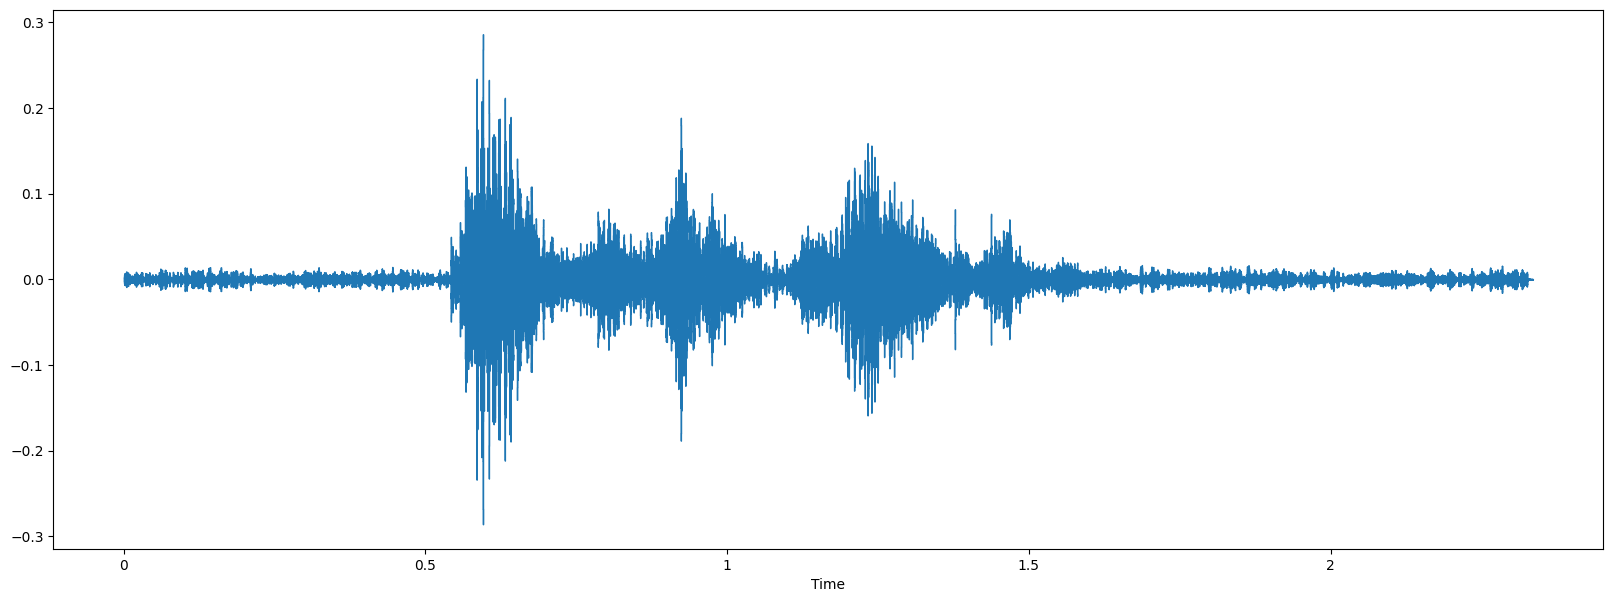

In [280]:
plt.figure(figsize=(20, 7))
librosa.display.waveshow(audio, sr=sampling_rate)

In [281]:
def feature_MFCC_Delta(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=44100,n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc)
    mfcc_delta = np.concatenate((mfcc, delta_mfcc), axis=0)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    return mfcc, mfcc_delta
feature_MFCC_Delta(file)

(array([[-5.1490253e+02, -4.8628821e+02, -4.8627994e+02, ...,
         -4.8065063e+02, -4.8134412e+02, -5.0036444e+02],
        [ 1.3992017e+02,  1.4476485e+02,  1.4704449e+02, ...,
          1.5182941e+02,  1.5174808e+02,  1.4843967e+02],
        [ 2.1398983e+01,  2.1977167e+01,  2.6568230e+01, ...,
          2.3102541e+01,  1.7534836e+01,  1.8850891e+01],
        ...,
        [-1.0396144e+01, -7.2519131e+00, -6.7316718e+00, ...,
         -1.5074946e+01, -1.6175694e+01, -9.8195086e+00],
        [-8.0132990e+00,  2.6015410e+00,  1.6107900e-01, ...,
         -8.6239090e+00, -8.4181051e+00, -3.4386473e+00],
        [-7.4888277e+00, -6.9750905e-02, -3.7460318e+00, ...,
         -1.0543483e+01, -7.3861332e+00, -3.1024227e+00]], dtype=float32),
 array([[-5.1490253e+02, -4.8628821e+02, -4.8627994e+02, ...,
         -4.8065063e+02, -4.8134412e+02, -5.0036444e+02],
        [ 1.3992017e+02,  1.4476485e+02,  1.4704449e+02, ...,
          1.5182941e+02,  1.5174808e+02,  1.4843967e+02],
        [ 

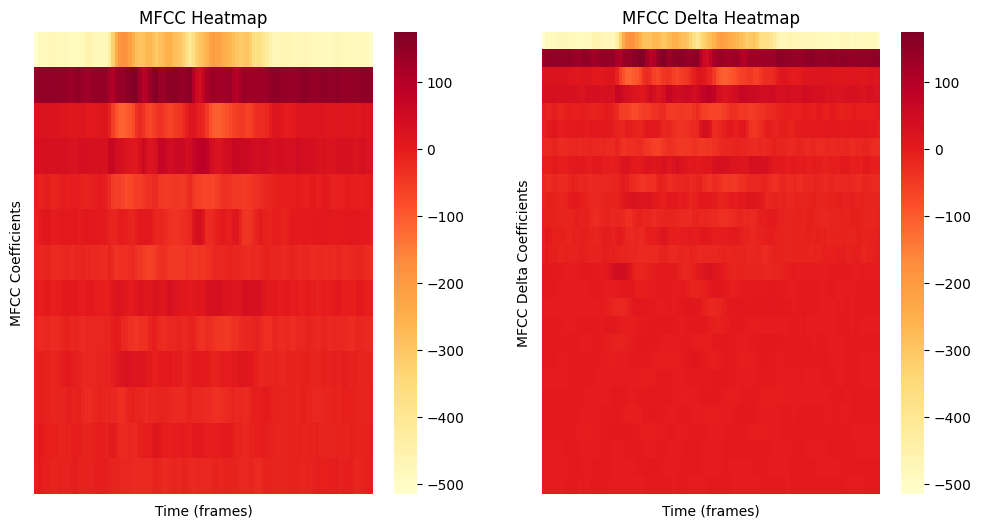

In [282]:
mfcc_matrix, mfcc_delta_matrix = feature_MFCC_Delta(file)
mfcc_df = pd.DataFrame(mfcc_matrix)
mfcc_delta_df = pd.DataFrame(mfcc_delta_matrix)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(mfcc_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('MFCC Heatmap')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('MFCC Coefficients')
sns.heatmap(mfcc_delta_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('MFCC Delta Heatmap')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('MFCC Delta Coefficients')
plt.show()

In [283]:
def feature_spectral_contrast(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=44100)
    return spectral_contrast
feature_spectral_contrast(file)

array([[ 4.12976206,  7.92457255, 25.9094962 , 12.69009038,  9.21288689,
        12.66482113,  7.16150265,  8.82212197, 12.5155013 , 14.89947961,
        16.35813978, 10.15975887, 17.43409106, 18.180922  , 14.95981218,
        13.55428384, 12.87971618, 14.11333894, 10.52130945,  9.92348649,
        15.96394041, 20.54644511, 12.69771616, 15.29300203, 11.81683112,
        11.69322366, 25.76802167, 15.69027233, 17.26136578, 11.10186743,
        10.48288419, 10.60474579, 14.25786016,  7.05991714, 21.51061761,
        10.93556441, 12.32969353, 11.35365115, 11.48895437, 14.15034257,
        11.6777646 , 13.28969324, 20.71523331, 21.05605495, 24.55718685,
        17.86496976, 23.41436527, 13.51386394, 13.12159269, 11.28447524,
        19.95149847, 20.88691432, 14.07943988, 17.55436793, 28.71255386,
        28.03136806, 22.05366858, 18.30131022, 10.49972902,  7.03589952,
        16.57814046, 18.59102598, 16.59838884, 18.56870876, 13.8800782 ,
         9.0654698 ,  9.25151155, 13.12929292, 15.2

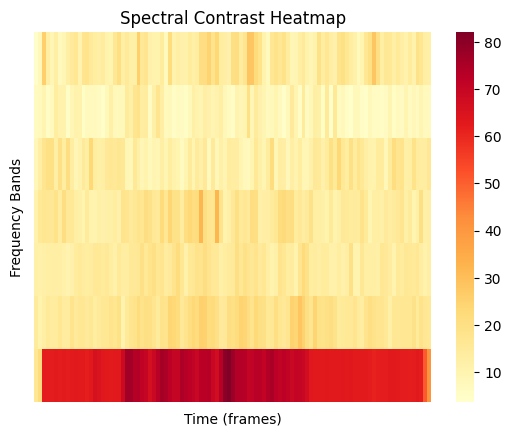

In [284]:
spectral_contrast_matrix = feature_spectral_contrast(file)
spec_df = pd.DataFrame(spectral_contrast_matrix)

sns.heatmap(spec_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [285]:
def feature_chroma(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    return chroma
feature_chroma(file)

array([[0.5471633 , 0.4312024 , 0.5559839 , ..., 0.862271  , 0.54647845,
        0.26350087],
       [0.62393755, 1.        , 0.89660627, ..., 1.        , 0.60756516,
        0.4252371 ],
       [0.5962417 , 0.5171733 , 0.3421908 , ..., 0.3888431 , 0.15506461,
        0.21568894],
       ...,
       [0.33175498, 0.39589563, 1.        , ..., 0.2256742 , 1.        ,
        1.        ],
       [0.6427184 , 0.70052767, 0.7428009 , ..., 0.5738907 , 0.9015734 ,
        0.8960349 ],
       [0.6348721 , 0.39258838, 0.212342  , ..., 0.44548276, 0.24763088,
        0.3100314 ]], dtype=float32)

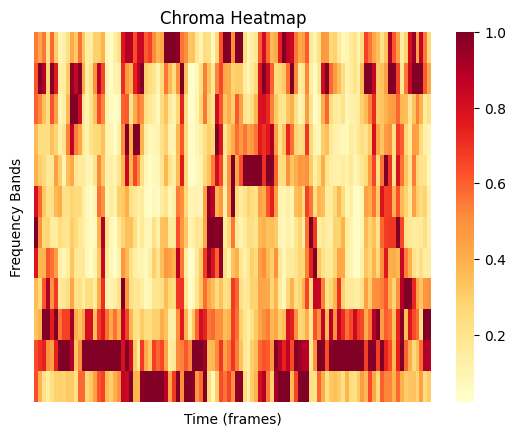

In [286]:
chroma_matrix = feature_chroma(file)
chroma_df = pd.DataFrame(chroma_matrix)

sns.heatmap(chroma_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Chroma Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [287]:
def feature_zero_crossing(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    return zero_crossing

feature_zero_crossing(file)

array([[0.01660156, 0.02148438, 0.02929688, 0.02880859, 0.02539062,
        0.02636719, 0.02539062, 0.02734375, 0.03173828, 0.03222656,
        0.03125   , 0.03515625, 0.02832031, 0.03222656, 0.04394531,
        0.03613281, 0.04150391, 0.03759766, 0.02587891, 0.02929688,
        0.03027344, 0.03613281, 0.07128906, 0.08789062, 0.09863281,
        0.10839844, 0.08691406, 0.08007812, 0.06738281, 0.06152344,
        0.08935547, 0.13476562, 0.14697266, 0.14550781, 0.11669922,
        0.06445312, 0.06396484, 0.06982422, 0.06298828, 0.06738281,
        0.06591797, 0.06103516, 0.06396484, 0.06005859, 0.05029297,
        0.04394531, 0.07714844, 0.171875  , 0.24755859, 0.27197266,
        0.25244141, 0.17041016, 0.10986328, 0.10400391, 0.10888672,
        0.12109375, 0.13085938, 0.12402344, 0.13818359, 0.14306641,
        0.13671875, 0.13769531, 0.12548828, 0.11621094, 0.11523438,
        0.12060547, 0.11279297, 0.11474609, 0.09619141, 0.07324219,
        0.05175781, 0.02441406, 0.02441406, 0.03

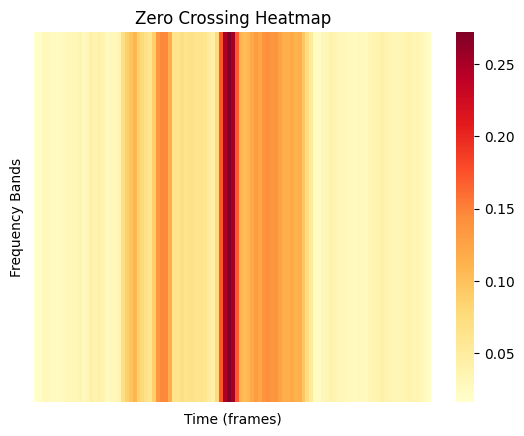

In [288]:
zero_crossing_matrix = feature_zero_crossing(file)
zero_crossing_df = pd.DataFrame(zero_crossing_matrix)

sns.heatmap(zero_crossing_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Zero Crossing Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [289]:
def feature_mel_spectograph(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr = sample_rate, n_fft = 2048, hop_length = 512, n_mels = 90)
    return mel_spectrogram

feature_mel_spectograph(file)

array([[8.9614221e-04, 2.7881179e-03, 7.5614713e-03, ..., 1.1609517e-03,
        7.1740575e-04, 8.7136304e-04],
       [1.4988275e-03, 5.5494537e-03, 1.5550783e-02, ..., 5.3542256e-02,
        2.5819054e-02, 8.0040703e-03],
       [1.9665882e-02, 1.4976438e-02, 1.3008903e-02, ..., 6.4552374e-02,
        3.9560940e-02, 3.1460647e-02],
       ...,
       [9.2497912e-09, 2.3017195e-09, 7.0139159e-17, ..., 2.2521780e-16,
        4.4967577e-15, 2.7943424e-13],
       [8.9714067e-09, 2.2326720e-09, 2.1171570e-16, ..., 5.0700084e-16,
        4.1677625e-15, 2.4191025e-13],
       [8.8208543e-09, 2.1953686e-09, 2.3535730e-17, ..., 3.4734254e-17,
        3.4682829e-15, 2.2105175e-13]], dtype=float32)

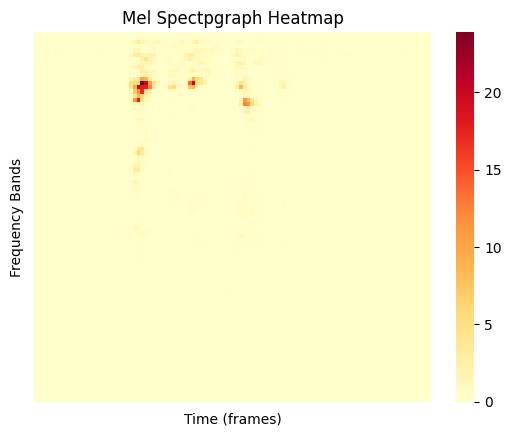

In [290]:
mel_spectograph_matrix = feature_mel_spectograph(file)
mel_spectograph_df = pd.DataFrame(mel_spectograph_matrix)

sns.heatmap(mel_spectograph_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Mel Spectpgraph Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [291]:
def feature_concat(file):
    mfcc_delta=feature_MFCC_Delta(file)[1]
    #zero_crossing=feature_zero_crossing(file)
    #chroma=feature_chroma(file)
    spectral_contrast=feature_spectral_contrast(file)
    #mel_spectpgraph=feature_mel_spectograph(file)
    #features = np.concatenate((mfcc_delta, spectral_contrast, chroma, zero_crossing,mel_spectpgraph), axis=0)
    features = np.concatenate((mfcc_delta), axis=0)
    return features
    
feature_concat(file)

array([-5.1490253e+02, -4.8628821e+02, -4.8627994e+02, ...,
        6.8031602e-02,  6.8031602e-02,  6.8031602e-02], dtype=float32)

In [292]:
print(len(directory))  

7442


In [293]:
feature=[]
for data in directory:
    if "NEU" in data:
        continue
    else:
        data="AudioWAV/"+str(data)
        f=feature_concat(data)
        feature.append(f)


In [294]:
df = pd.DataFrame({'Emotion': emotion,
                   'Path': path})

In [295]:
feature_df=pd.DataFrame({"Feature":feature})

In [296]:
df

,Emotion,Path
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav
...,...,...
6350,Angry,AudioWAV/1091_WSI_ANG_XX.wav
6351,Disgust,AudioWAV/1091_WSI_DIS_XX.wav
6352,Fear,AudioWAV/1091_WSI_FEA_XX.wav
6353,Happy,AudioWAV/1091_WSI_HAP_XX.wav


In [302]:
feature_df

,Feature
0,"[-640.0257, -545.2644, -490.7758, -476.84476, ..."
1,"[-514.9025, -486.2882, -486.27994, -483.59814,..."
2,"[-471.76978, -469.3504, -473.20782, -472.6994,..."
3,"[-478.5091, -460.40796, -453.89194, -453.2373,..."
4,"[-519.67883, -490.0861, -483.53683, -482.50247..."
...,...
6350,"[-562.1233, -530.83356, -530.1231, -531.8273, ..."
6351,"[-557.558, -532.9816, -539.49255, -537.2714, -..."
6352,"[-509.87415, -524.8066, -537.75385, -537.369, ..."
6353,"[-564.12274, -533.93024, -528.70087, -526.9827..."


In [303]:
feature_df

,Feature
0,"[-640.0257, -545.2644, -490.7758, -476.84476, ..."
1,"[-514.9025, -486.2882, -486.27994, -483.59814,..."
2,"[-471.76978, -469.3504, -473.20782, -472.6994,..."
3,"[-478.5091, -460.40796, -453.89194, -453.2373,..."
4,"[-519.67883, -490.0861, -483.53683, -482.50247..."
...,...
6350,"[-562.1233, -530.83356, -530.1231, -531.8273, ..."
6351,"[-557.558, -532.9816, -539.49255, -537.2714, -..."
6352,"[-509.87415, -524.8066, -537.75385, -537.369, ..."
6353,"[-564.12274, -533.93024, -528.70087, -526.9827..."


In [311]:
feature_df['Feature'][1][2600]

0.31705543

In [305]:
df = pd.concat([df,pd.DataFrame(feature_df['Feature'].values.tolist())],axis=1)

In [306]:
df.head()

,Emotion,Path,0,1,2,3,4,5,6,7,...,5606,5607,5608,5609,5610,5611,5612,5613,5614,5615
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,-640.025696,-545.264404,-490.775787,-476.844757,-478.006500,-474.908600,-475.680603,-473.869507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,-514.902527,-486.288208,-486.279938,-483.598145,-477.825500,-476.001617,-479.512695,-481.453491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,-471.769775,-469.350403,-473.207825,-472.699402,-472.700623,-471.888458,-470.216949,-467.069214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,-478.509094,-460.407959,-453.891937,-453.237305,-457.589050,-461.297516,-452.775604,-451.145294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,-519.678833,-490.086090,-483.536835,-482.502472,-484.826233,-483.700745,-479.574158,-479.868134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
